# Практическая работа №4

In [1]:
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

## Задание №1

Определить два вектора, представляющие собой число автомобилей, припаркованных в течение 5 рабочих дней у бизнес-центра на уличной стоянке и в подземном гараже.

| День        | Улица | Гараж |
|-------------|-------|-------|
| Понедельник | 80    | 100   |
| Вторник     | 98    | 82    |
| Среда       | 75    | 105   |
| Четверг     | 91    | 89    |
| Пятница     | 78    | 102   |

In [2]:
street_parking = np.array([80, 98, 75, 91, 78])
garage_parking = np.array([100, 82, 105, 89, 102])

# Выводим векторы
street_parking, garage_parking

(array([80, 98, 75, 91, 78]), array([100,  82, 105,  89, 102]))

Найти и интерпретировать корреляцию между переменными «Улица» и «Гараж» (подсчитать корреляцию по Пирсону). Построить диаграмму рассеяния для вышеупомянутых переменных.

**Теория**:

Коэффициент Пирсона измеряет линейную зависимость между двумя переменными:
- Если коэффициент равен 1, это означает, что переменные полностью положительно коррелированны;
- Если коэффициент равен -1, это означает, что переменные полностью отрицательно коррелированны;
- Значение около 0 означает отсутствие линейной зависимости.

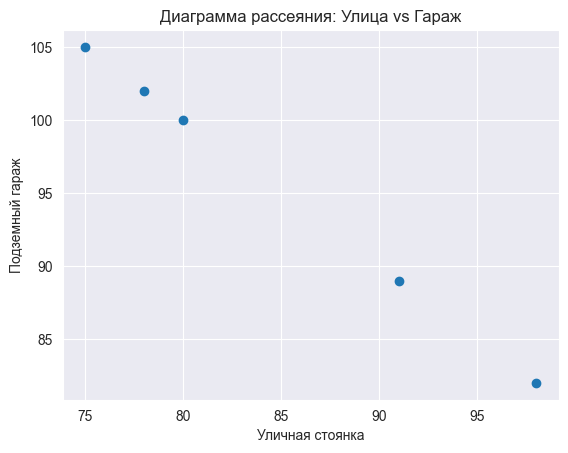

Корреляция Пирсона: -1.0
p-значение: 0.0


In [3]:
# Расчёт корреляции Пирсона
correlation, p_value = stats.pearsonr(street_parking, garage_parking)

# Диаграмма рассеяния
plt.scatter(street_parking, garage_parking)
plt.title('Диаграмма рассеяния: Улица vs Гараж')
plt.xlabel('Уличная стоянка')
plt.ylabel('Подземный гараж')
plt.grid(True)
plt.show()

print("Корреляция Пирсона:", correlation)
print("p-значение:", p_value)

## Задание №2

Найти и выгрузить данные. Вывести, провести предобработку и описать признаки.

In [4]:
# Загрузка данных
data = sns.load_dataset('tips')

# Вывод первых строк данных
print(data.head())

# Описание признаков
print(data.info())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


Построить корреляционную матрицу по одной целевой переменной. Определить наиболее коррелирующую переменную, продолжить с ней работу в следующем пункте.

             total_bill       tip      size  sex_Female  smoker_No   day_Fri  \
total_bill     1.000000  0.675734  0.598315   -0.144877  -0.085721 -0.086168   
tip            0.675734  1.000000  0.489299   -0.088862  -0.005929 -0.055463   
size           0.598315  0.489299  1.000000   -0.086195   0.133178 -0.142184   
sex_Female    -0.144877 -0.088862 -0.086195    1.000000   0.002816  0.071060   
smoker_No     -0.085721 -0.005929  0.133178    0.002816   1.000000 -0.244316   
day_Fri       -0.086168 -0.055463 -0.142184    0.071060  -0.244316  1.000000   
day_Sat        0.054919 -0.002790 -0.041121   -0.053957  -0.155744 -0.216319   
day_Sun        0.122953  0.125114  0.193054   -0.168106   0.181624 -0.195451   
time_Dinner    0.183118  0.121629  0.103411   -0.205231  -0.054921 -0.058159   

              day_Sat   day_Sun  time_Dinner  
total_bill   0.054919  0.122953     0.183118  
tip         -0.002790  0.125114     0.121629  
size        -0.041121  0.193054     0.103411  
sex_Female 

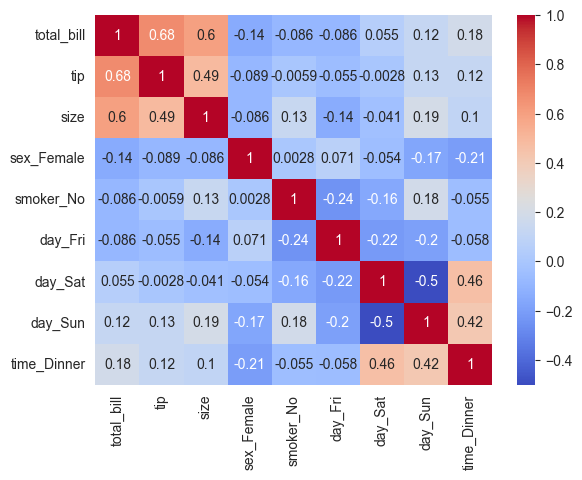

Наиболее коррелирующая переменная с 'total_bill' — 'tip'


In [5]:
# Преобразуем категориальные переменные в числовые значения (например, с помощью pd.get_dummies)
data_numeric = pd.get_dummies(data, drop_first=True)

# Построение корреляционной матрицы
correlation_matrix = data_numeric.corr()

# Вывод корреляционной матрицы
print(correlation_matrix)

# Построим тепловую карту корреляций
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Определим наиболее коррелирующую переменную с целевой (например, 'total_bill')
target = 'total_bill'
most_correlated = correlation_matrix[target].drop(target).idxmax()
print(f"Наиболее коррелирующая переменная с '{target}' — '{most_correlated}'")

Реализовать регрессию вручную, отобразить наклон, сдвиг и MSE.

In [6]:
# Выбираем целевую и наиболее коррелирующую переменные
X = data[most_correlated]
y = data[target]

# Добавляем константный член для сдвига
X_b = np.c_[np.ones((len(X), 1)), X]

# Реализуем решение уравнений для линейной регрессии
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Наклон и сдвиг
slope = theta_best[1]
intercept = theta_best[0]

# Предсказание и расчет MSE
y_pred = X_b.dot(theta_best)
mse = mean_squared_error(y, y_pred)

print(f"Наклон (slope): {slope}")
print(f"Сдвиг (intercept): {intercept}")
print(f"MSE: {mse}")

Наклон (slope): 4.347714207346629
Сдвиг (intercept): 6.750283771267831
MSE: 42.88823752111094


Визуализировать регрессию на графике.

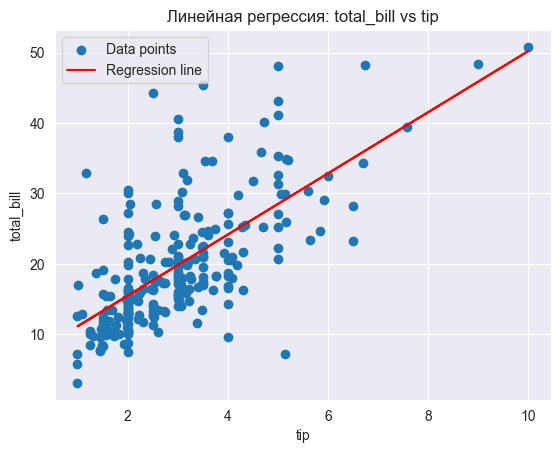

In [7]:
# Визуализация линейной регрессии
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel(most_correlated)
plt.ylabel(target)
plt.title(f'Линейная регрессия: {target} vs {most_correlated}')
plt.legend()
plt.show()

## Задание №3

Загрузить данные: 'insurance.csv'. Вывести и провести предобработку. Вывести список уникальных регионов.

In [8]:
df = pd.read_csv('./data/pract4/insurance.csv')

# Удаление дубликатов и строк с пропущенными значениями
df_cleaned = df.drop_duplicates().dropna()
print(df_cleaned.shape, "\n", df_cleaned.head())

unique_regions = df_cleaned['region'].unique()
print(f"Уникальные регионы: {unique_regions}")

(1337, 7) 
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Уникальные регионы: ['southwest' 'southeast' 'northwest' 'northeast']


Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), через библиотеку Scipy.

**Теория**:

Однофакторный ANOVA (анализ дисперсий) используется для проверки гипотезы о равенстве средних значений среди нескольких групп. Это статистический тест, который сравнивает вариации внутри групп с вариациями между группами. Если вариация между группами значительно больше вариации внутри групп, можно сделать вывод о наличии значимых различий.

ANOVA рассчитывает отношение двух видов дисперсий — между группами (как сильно средние значения групп отличаются друг от друга) и внутри групп (как сильно значения внутри группы отличаются от её среднего). Если дисперсия между группами значительно больше, чем дисперсия внутри групп, то P-значение будет меньше 0.05, что означает, что между группами есть значимые различия.



In [9]:
# Группировка данных по регионам для анализа влияния региона на BMI
bmi_by_region = [df_cleaned[df_cleaned['region'] == region]['bmi'] for region in unique_regions]

# Выполнение однофакторного ANOVA теста с использованием SciPy
f_stat, p_value = stats.f_oneway(*bmi_by_region)

print(f"f_stat: {f_stat}, p_value: {p_value}")

f_stat: 39.48593864487439, p_value: 1.9087293927449287e-24


**Результат**:

- F-статистика показывает отношение дисперсий между и внутри групп;
- P-значение сообщает, насколько маловероятно получить такие результаты случайно при условии, что нулевая гипотеза верна (нулевая гипотеза утверждает, что средние значения всех групп равны).

В данном случае P-значение оказалось крайне малым (1.91e-24), что говорит о том, что средние значения BMI в разных регионах значительно различаются.

Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), с помощью функции anova_lm() из библиотеки statsmodels;

**Теория**:

Модель ols() (обыкновенные наименьшие квадраты) в statsmodels используется для создания линейной модели, после чего функция anova_lm() применяет ANOVA к результатам этой модели. Этот метод более гибкий и позволяет лучше понимать влияние каждой переменной на результат.

Линейная модель ols() создаёт уравнение для зависимости между независимой переменной (в нашем случае это регион) и зависимой переменной (BMI). Функция anova_lm() проверяет, насколько изменения независимой переменной (регион) объясняют изменения зависимой переменной (BMI).

In [10]:
# Построение модели OLS (обыкновенные наименьшие квадраты) для анализа зависимости BMI от региона
model = ols('bmi ~ C(region)', data=df_cleaned).fit()

# Выполнение однофакторного ANOVA теста с использованием anova_lm() из библиотеки statsmodels
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                 sum_sq      df          F        PR(>F)
C(region)   4057.813904     3.0  39.485939  1.908729e-24
Residual   45662.381091  1333.0        NaN           NaN


**Результат**:

Значение P для региона также крайне низкое (1.91e-24), что подтверждает выводы, сделанные на основе SciPy: регион оказывает значимое влияние на индекс массы тела.

С помощью t критерия Стьюдента перебрать все пары. Определить поправку Бонферрони. Сделать выводы.

**Теория**:

T-критерий Стьюдента используется для попарного сравнения средних значений двух групп. Однако, когда проводятся множественные тесты, возрастает вероятность ошибки первого рода (ложноположительного результата). Для этого применяется поправка Бонферрони, которая корректирует уровень значимости, деля его на количество попарных сравнений.

Сравниваются средние значения BMI для каждой пары регионов с использованием T-критерия и применяем поправку Бонферрони, чтобы избежать завышенной вероятности ошибки.

In [11]:
# Выполнение попарных T-тестов для регионов и применение поправки Бонферрони
pairwise_results = pairwise_tukeyhsd(df_cleaned['bmi'], df_cleaned['region'], alpha=0.05)
print(pairwise_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest    0.022    1.0 -1.1608  1.2048  False
northeast southeast   4.1825    0.0  3.0326  5.3324   True
northeast southwest   1.4231 0.0107  0.2412   2.605   True
northwest southeast   4.1605    0.0  3.0106  5.3104   True
northwest southwest   1.4011 0.0125  0.2192   2.583   True
southeast southwest  -2.7594    0.0 -3.9083 -1.6104   True
----------------------------------------------------------


**Результат**:

Было выявлено, что некоторые регионы имеют значимые различия в средних значениях BMI. Поправка Бонферрони помогла уменьшить вероятность ложных выводов.

Выполнить пост-хок тесты Тьюки и построить график.

**Теория**:

Пост-хок тесты, такие как тест Тьюки, используются после проведения ANOVA для выявления того, какие именно группы отличаются друг от друга. Тест Тьюки проверяет все возможные парные сравнения и корректирует уровень значимости.

Тест Тьюки сравнивает каждую пару групп (в данном случае — регионов) и проверяет, есть ли между ними значимые различия. Результаты выводятся с доверительными интервалами, что позволяет оценить точность различий.

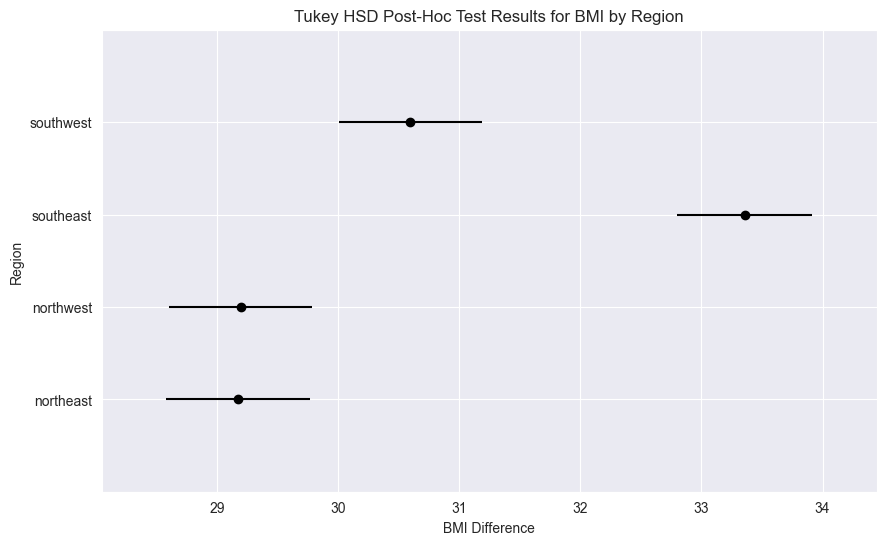

In [12]:
# Построение графика с результатами теста Тьюки
pairwise_results.plot_simultaneous(figsize=(10, 6))
plt.title('Tukey HSD Post-Hoc Test Results for BMI by Region')
plt.xlabel('BMI Difference')
plt.ylabel('Region')
plt.show()

**Результат**:

График показал, что значимые различия имеются между некоторыми парами регионов, особенно между southeast и другими регионами.

Выполнить двухфакторный ANOVA тест, чтобы проверить влияние региона и пола на индекс массы тела (BMI), используя функцию anova_lm() из библиотеки statsmodels.

**Теория**:

Двухфакторный ANOVA тест проверяет влияние двух факторов (в данном случае регион и пол) на зависимую переменную (BMI). Также он проверяет, существует ли взаимодействие между этими факторами.

Тест оценивает влияние каждого фактора (регион и пол) отдельно, а также проверяет их взаимодействие. Взаимодействие показывает, изменяется ли эффект одного фактора в зависимости от другого.

In [13]:
# Создание новой модели OLS для анализа влияния региона и пола на BMI
model_2way = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data=df_cleaned).fit()

# Выполнение двухфакторного ANOVA теста
anova_2way_results = sm.stats.anova_lm(model_2way, typ=2)
print(anova_2way_results)

                        sum_sq      df          F        PR(>F)
C(region)          4036.141807     3.0  39.381780  2.215903e-24
C(sex)               85.359929     1.0   2.498643  1.141824e-01
C(region):C(sex)    175.040197     3.0   1.707917  1.635099e-01
Residual          45401.980965  1329.0        NaN           NaN


**Результат**:

- Регион продолжает оказывать значимое влияние на BMI;
- Пол сам по себе не оказывает значимого влияния на BMI;
- Взаимодействие между регионом и полом также незначительно.

Выполнить пост-хок тесты Тьюки и построить график.

**Теория**:

Пост-хок тест Тьюки для двухфакторного ANOVA позволяет сравнивать комбинации факторов (в данном случае регион + пол) для выявления пар, между которыми есть значимые различия.

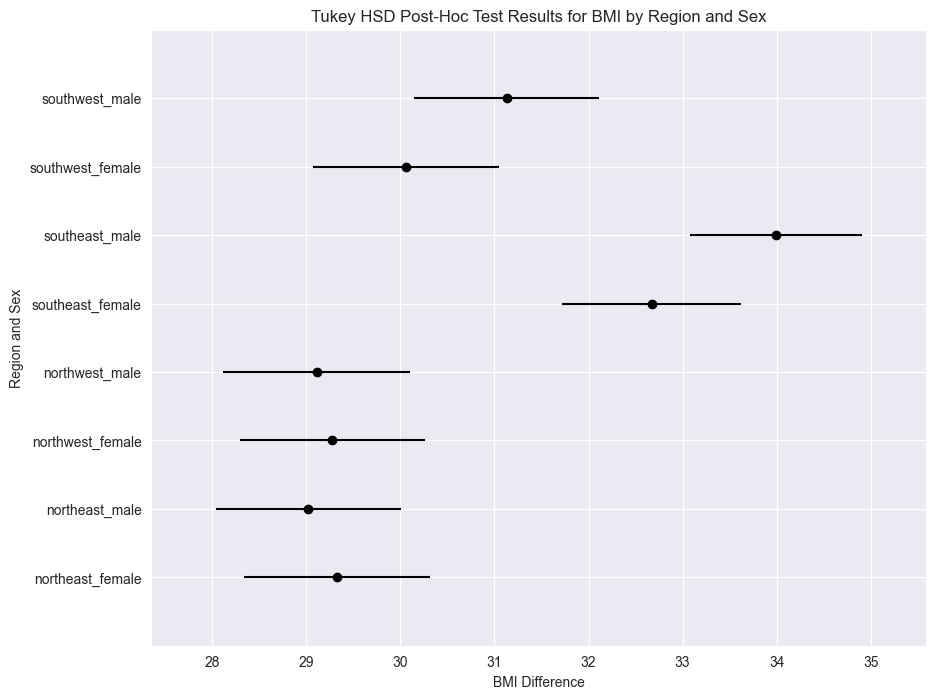

In [14]:
# Добавление нового столбца для комбинации регион + пол
df_cleaned['region_sex'] = df_cleaned['region'] + '_' + df_cleaned['sex']

# Выполнение теста Тьюки для комбинации факторов регион и пол
tukey_2way_results = pairwise_tukeyhsd(df_cleaned['bmi'], df_cleaned['region_sex'], alpha=0.05)

# Визуализация результатов теста Тьюки для двухфакторного ANOVA
tukey_2way_results.plot_simultaneous(figsize=(10, 8))
plt.title('Tukey HSD Post-Hoc Test Results for BMI by Region and Sex')
plt.xlabel('BMI Difference')
plt.ylabel('Region and Sex')
plt.show()

**Результат**:

На графике видно, что некоторые комбинации региона и пола имеют статистически значимые различия в BMI. Однако само взаимодействие регион-пол в общем анализе не оказалось значимым.